In [7]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
raw_data_folder_path = Path("../data/etf_data/price/")
processed_data_folder_path = Path("../data/etf_data/processed/")

In [30]:
data_list = os.listdir(raw_data_folder_path)
# data_list.remove(".DS_Store")

In [48]:
qqq_data = pd.read_csv(raw_data_folder_path / "QQQ_2024-03-05.csv")
qqq_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,1999-03-10 00:00:00-05:00,43.658368,43.685054,42.937845,43.604996,5232000,0.0,0.0,0.0
1,1999-03-11 00:00:00-05:00,43.925218,44.178735,42.964521,43.818474,9688600,0.0,0.0,0.0
2,1999-03-12 00:00:00-05:00,43.658347,43.685033,42.404104,42.751022,8743600,0.0,0.0,0.0
3,1999-03-15 00:00:00-05:00,43.071237,44.031933,42.617574,43.978561,6369000,0.0,0.0,0.0
4,1999-03-16 00:00:00-05:00,44.165393,44.538998,43.685045,44.352196,4905800,0.0,0.0,0.0


In [49]:
# Parse the 'Date' column and set as index
qqq_data['Date'] = pd.to_datetime(qqq_data['Date'], utc=True)
qqq_data.set_index('Date', inplace=True)

In [53]:
# Prepare different period of dataframe
qqq_2020 = qqq_data[qqq_data.index >= "2020-01-01"]
qqq_2022 = qqq_data[qqq_data.index >= "2022-01-01"]

# Close Price

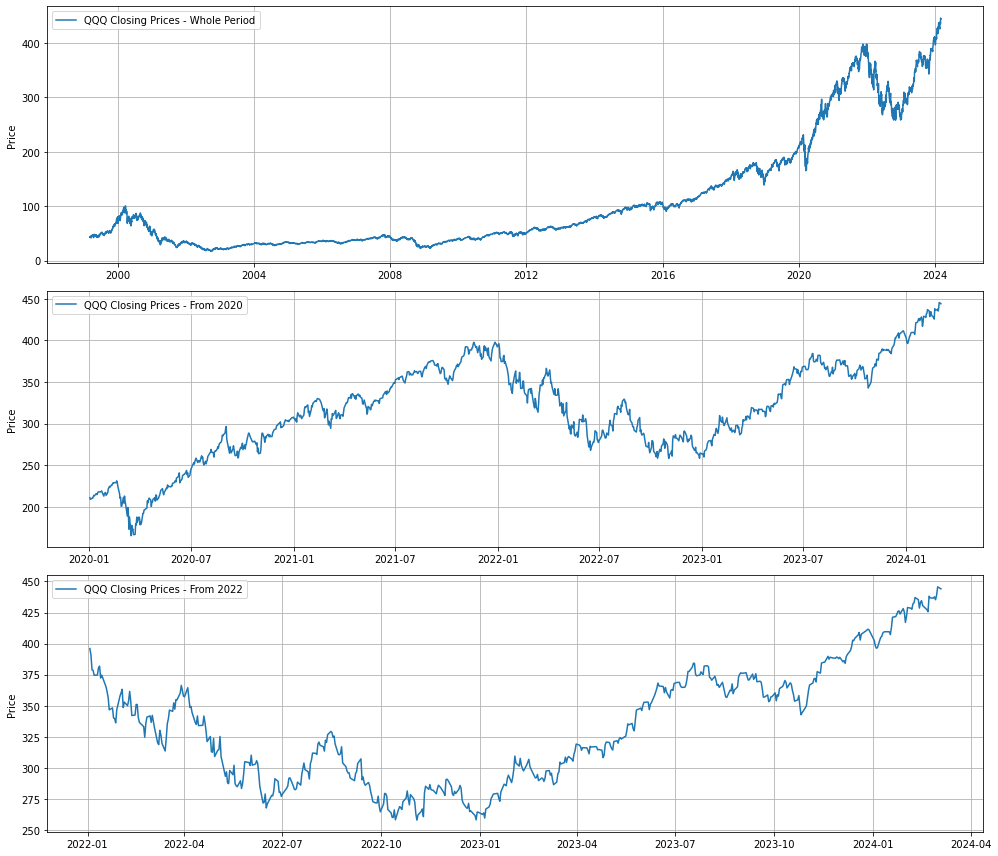

In [54]:
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

# Plot the 'Close' column from each DataFrame on a different subplot
axs[0].plot(qqq_data.index, qqq_data['Close'], label="QQQ Closing Prices - Whole Period")
axs[1].plot(qqq_2020.index, qqq_2020['Close'], label="QQQ Closing Prices - From 2020")
axs[2].plot(qqq_2022.index, qqq_2022['Close'], label="QQQ Closing Prices - From 2022")

# Adding grid and legend to each subplot
for ax in axs:
    ax.grid(True)  # Enable grid
    ax.set_ylabel("Price")
    ax.legend()  # Show legend

# Adjust layout
plt.tight_layout()
plt.show()

# Simple Moving Average (SMA)

Helps identify trends of short-term and long-term.

In [55]:
# Calculating and plotting Moving Averages (50-day and 200-day)
qqq_data['SMA_50'] = qqq_data['Close'].rolling(window=50).mean()
qqq_data['SMA_200'] = qqq_data['Close'].rolling(window=200).mean()

qqq_2020['SMA_50'] = qqq_2020['Close'].rolling(window=50).mean()
qqq_2020['SMA_200'] = qqq_2020['Close'].rolling(window=200).mean()

qqq_2022['SMA_50'] = qqq_2022['Close'].rolling(window=50).mean()
qqq_2022['SMA_200'] = qqq_2022['Close'].rolling(window=200).mean()

# plt.figure(figsize=(14, 7))
# plt.plot(qqq_data['Close'], label='Close Price')
# plt.plot(qqq_data['SMA_50'], label='50-Day SMA')
# plt.plot(qqq_data['SMA_200'], label='200-Day SMA')
# plt.title("QQQ Close Price and Moving Averages")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.legend()
# plt.grid()
# plt.show()

<ipython-input-55-3eade8f5c9aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq_2020['SMA_50'] = qqq_2020['Close'].rolling(window=50).mean()
<ipython-input-55-3eade8f5c9aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq_2020['SMA_200'] = qqq_2020['Close'].rolling(window=200).mean()
<ipython-input-55-3eade8f5c9aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

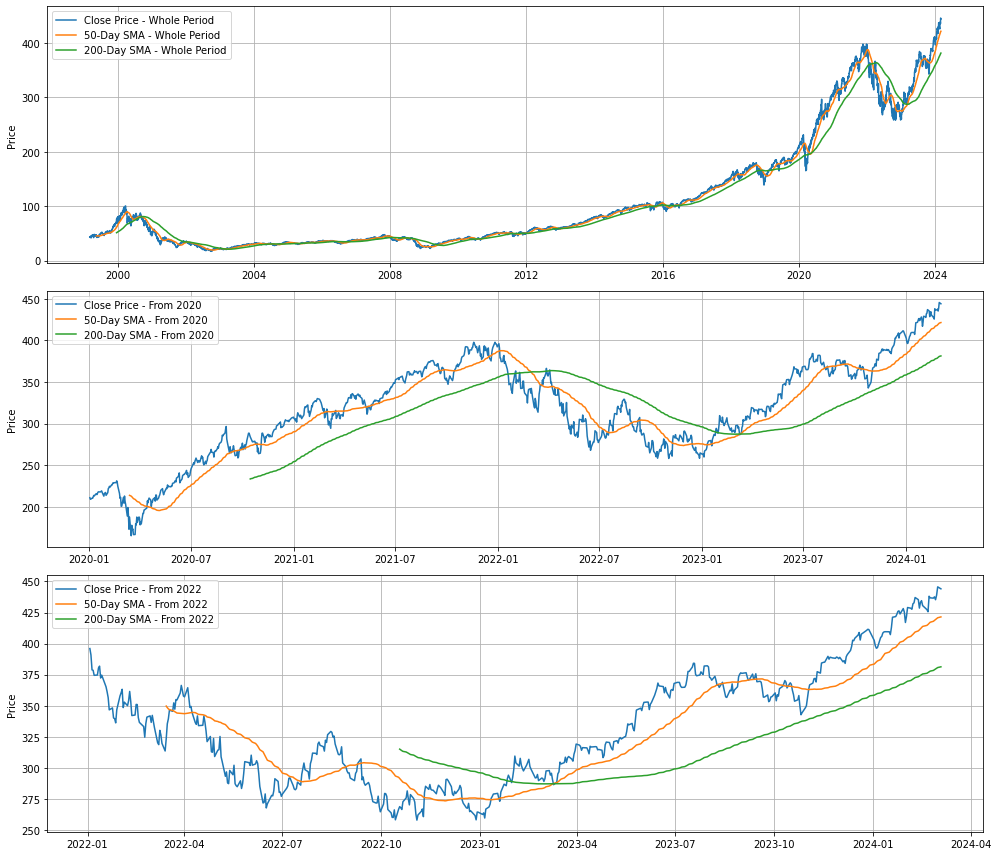

In [56]:
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

# Plot the 'Close' column from each DataFrame on a different subplot
axs[0].plot(qqq_data.index, qqq_data['Close'], label="Close Price - Whole Period")
axs[0].plot(qqq_data.index, qqq_data['SMA_50'], label="50-Day SMA - Whole Period")
axs[0].plot(qqq_data.index, qqq_data['SMA_200'], label="200-Day SMA - Whole Period")

axs[1].plot(qqq_2020.index, qqq_2020['Close'], label="Close Price - From 2020")
axs[1].plot(qqq_2020.index, qqq_2020['SMA_50'], label="50-Day SMA - From 2020")
axs[1].plot(qqq_2020.index, qqq_2020['SMA_200'], label="200-Day SMA - From 2020")

axs[2].plot(qqq_2022.index, qqq_2022['Close'], label="Close Price - From 2022")
axs[2].plot(qqq_2022.index, qqq_2022['SMA_50'], label="50-Day SMA - From 2022")
axs[2].plot(qqq_2022.index, qqq_2022['SMA_200'], label="200-Day SMA - From 2022")

# Adding grid and legend to each subplot
for ax in axs:
    ax.grid(True)  # Enable grid
    ax.set_ylabel("Price")
    ax.legend()  # Show legend

# Adjust layout
plt.tight_layout()
plt.show()

There is a famous investment strategy is known as **"Moving Average Crossover strategy".**

This strategy involves two moving averages of a stock's price: a short-term moving average and a long-term moving average. These moving averages smooth out the stock's price data over a specific period by creating a constantly updated average price.

In the Moving Average Crossover strategy, the two key events to look for are:

- The "Golden Cross" - This occurs when the **short-term moving average crosses above the long-term moving average**. It's considered a **bullish (buy) signal**, suggesting that the stock's price is gaining momentum and could be headed higher.

- The "Death Cross" - This happens when the **short-term moving average crosses below the long-term moving average**. It's considered a **bearish (sell) signal**, indicating that the stock's price is losing momentum and could be headed lower.

However, like all trading strategies, the Moving Average Crossover strategy is not foolproof and can generate false signals, especially in volatile or sideways markets. 

### Volatile Markets

Volatile markets are characterized by rapid and significant price movements within a short period. In such markets, prices can swing wildly up and down due to various factors like economic news, earnings reports, geopolitical events, or market sentiment changes.

### Sideways Markets

Sideways or range-bound markets are when the price of a stock or an index moves within a relatively stable range without forming any clear upward or downward trend.

# Exponential Moving Averages (EMA)

EMAs provide a more responsive analysis to recent price movements compared to SMAs, which is particularly useful in identifying trend directions more quickly.

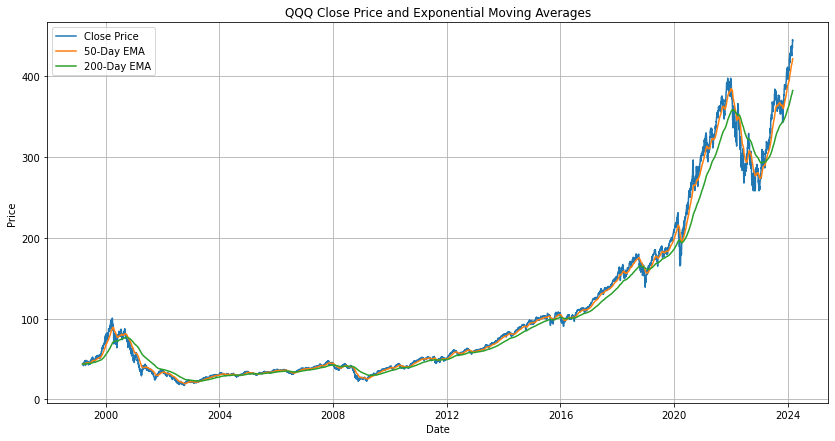

In [12]:
# Calculating Exponential Moving Averages (EMA) for 50-day and 200-day periods
qqq_data['EMA_50'] = qqq_data['Close'].ewm(span=50, adjust=False).mean()
qqq_data['EMA_200'] = qqq_data['Close'].ewm(span=200, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(qqq_data['Close'], label='Close Price')
plt.plot(qqq_data['EMA_50'], label='50-Day EMA')
plt.plot(qqq_data['EMA_200'], label='200-Day EMA')
plt.title("QQQ Close Price and Exponential Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Volume

Spikes in trading volume can be associated with significant price movements, indicating strong buyer or seller interest.

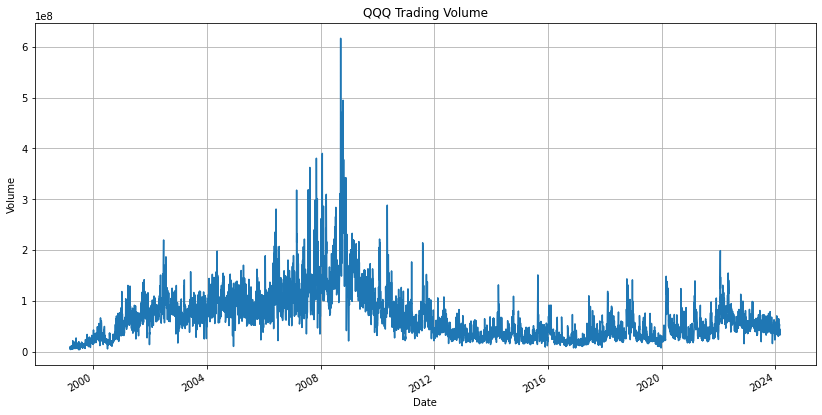

In [14]:
# Plotting trading volume
plt.figure(figsize=(14, 7))
qqq_data['Volume'].plot(title="QQQ Trading Volume")
plt.ylabel("Volume")
plt.grid()
plt.show()

# Relative Strength Index (RSI)

The RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions. **A stock is generally considered overbought when the RSI is above 70 and oversold when it is below 30.**

In [16]:
# Calculate the RSI for a 14-day window
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

qqq_data['RSI'] = calculate_rsi(qqq_data['Close'])
qqq_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,SMA_50,SMA_200,EMA_50,EMA_200,RSI
Date,,,,,,,,,,,,,
2024-02-27 05:00:00+00:00,437.670013,437.989990,435.029999,437.600006,33713200,0.0,0.0,0.0,418.630748,379.007094,418.481071,380.157129,60.459759
2024-02-28 05:00:00+00:00,435.429993,436.670013,434.299988,435.269989,32938800,0.0,0.0,0.0,419.288663,379.561128,419.139459,380.705516,53.582340
2024-02-29 05:00:00+00:00,438.230011,440.089996,435.019989,439.000000,42495200,0.0,0.0,0.0,419.982277,380.139631,419.918304,381.285561,56.374437
2024-03-01 05:00:00+00:00,439.899994,446.579987,439.839996,445.609985,43809200,0.0,0.0,0.0,420.757157,380.742430,420.925821,381.925605,58.382273
2024-03-04 05:00:00+00:00,445.609985,446.040009,443.769989,444.019989,33822430,0.0,0.0,0.0,421.458658,381.335439,421.831475,382.543459,58.519799


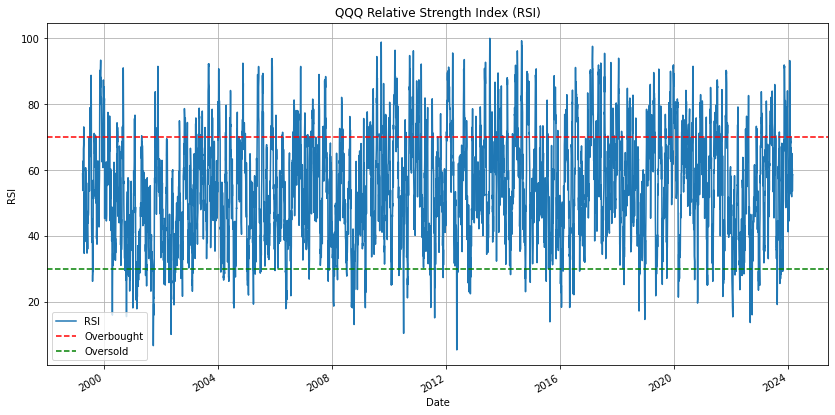

In [17]:
plt.figure(figsize=(14, 7))
qqq_data['RSI'].plot(title="QQQ Relative Strength Index (RSI)")
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.ylabel("RSI")
plt.legend()
plt.grid()
plt.show()

# Moving Average Convergence Divergence (MACD)

- MACD Line: The difference between the 26-day and 12-day exponential moving averages of closing prices.
- Signal Line: The 9-day exponential moving average of the MACD Line.
- MACD Histogram: The difference between the MACD Line and the Signal Line.

The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. It can indicate bullish or bearish movements. Let's calculate these components and plot them.

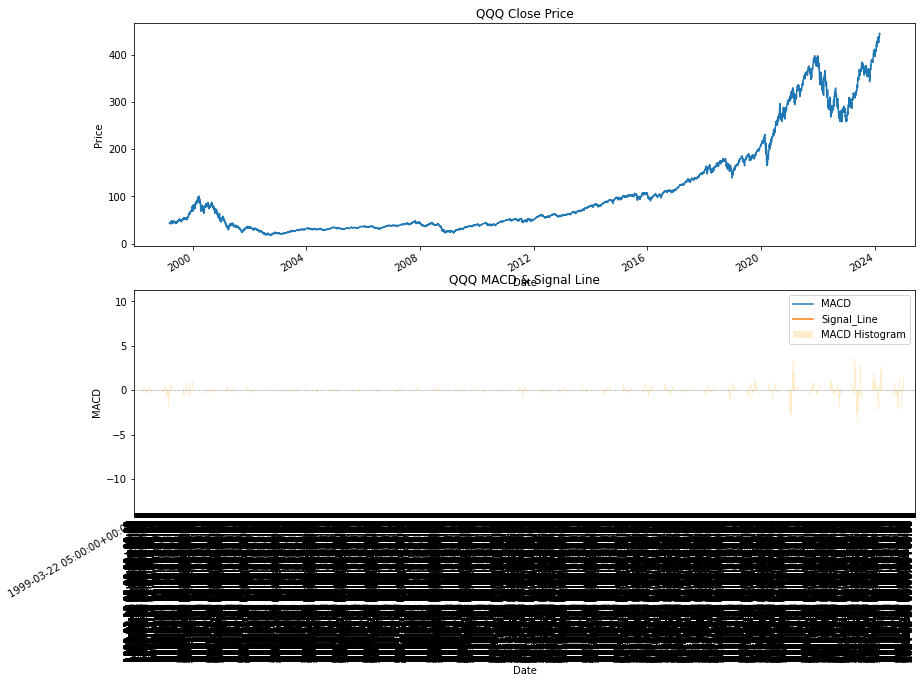

In [18]:
# Calculate the MACD and Signal Line
qqq_data['MACD'] = qqq_data['Close'].ewm(span=12, adjust=False).mean() - qqq_data['Close'].ewm(span=26, adjust=False).mean()
qqq_data['Signal_Line'] = qqq_data['MACD'].ewm(span=9, adjust=False).mean()
qqq_data['MACD_Histogram'] = qqq_data['MACD'] - qqq_data['Signal_Line']

# Plotting the MACD line, Signal line, and MACD Histogram
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot Close Price
qqq_data['Close'].plot(ax=ax[0], title="QQQ Close Price")
ax[0].set_ylabel("Price")

# Plot MACD lines
qqq_data[['MACD', 'Signal_Line']].plot(ax=ax[1], title="QQQ MACD & Signal Line")
qqq_data['MACD_Histogram'].plot(ax=ax[1], kind='bar', alpha=0.2, label='MACD Histogram', color='orange')
ax[1].axhline(0, linestyle='--', color='gray', linewidth=0.5)
ax[1].set_ylabel("MACD")
ax[1].legend()

plt.show()